In [68]:
#Loading required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
from nltk.stem import WordNetLemmatizer
from nltk import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [69]:
#load the datatset
df=pd.read_csv("twitter_validation.csv",encoding="latin-1",header=None)

In [70]:

df

,0,1,2,3
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [71]:
df.columns=['id','location','target','text']
df.head()

,id,location,target,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [72]:
#Checking for null values
df.isna().sum()

id          0
location    0
target      0
text        0
dtype: int64

In [73]:
#print length of data
print("length of data is: " ,len(df))

length of data is:  1000


In [74]:
loc_count = df["location"].value_counts()

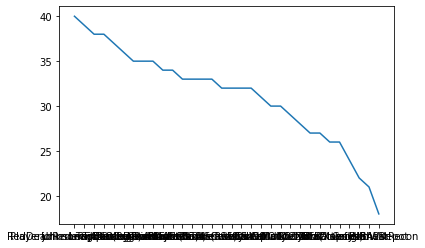

In [75]:
plt.plot(loc_count)

<AxesSubplot:xlabel='location', ylabel='count'>

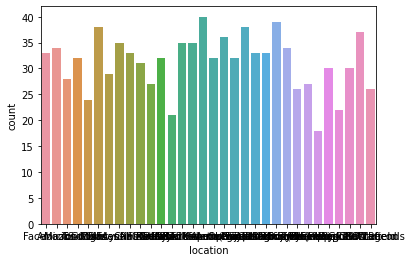

In [76]:
sns.countplot(x="location",data=df)

In [77]:
df['target'].value_counts()

Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

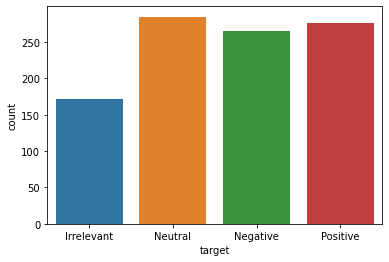

In [78]:
sns.countplot(x='target',data=df)

In [79]:
df.drop(df.index[(df['target']=='Irrelevant')],axis=0,inplace=True)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 828 entries, 1 to 999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        828 non-null    int64 
 1   location  828 non-null    object
 2   target    828 non-null    object
 3   text      828 non-null    object
dtypes: int64(1), object(3)
memory usage: 32.3+ KB


In [81]:
df.reset_index(drop=True,inplace=True)

In [82]:
#remove the unneccessary columns
df.drop(['id','location'],axis=1,inplace=True)
df

,target,text
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...
823,Negative,Please explain how this is possible! How can t...
824,Positive,Good on Sony. As much as I want to see the new...
825,Positive,Today sucked so itâs time to drink wine n pl...
826,Positive,Bought a fraction of Microsoft today. Small wins.


In [83]:
#mapping target variables
df['target']= df['target'].map({'Negative':-1,'Positive':1,'Neutral':0})
df

,target,text
0,0,BBC News - Amazon boss Jeff Bezos rejects clai...
1,-1,@Microsoft Why do I pay for WORD when it funct...
2,-1,"CSGO matchmaking is so full of closet hacking,..."
3,0,Now the President is slapping Americans in the...
4,-1,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...
823,-1,Please explain how this is possible! How can t...
824,1,Good on Sony. As much as I want to see the new...
825,1,Today sucked so itâs time to drink wine n pl...
826,1,Bought a fraction of Microsoft today. Small wins.


In [84]:
tweets=df.text  
tweets

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking,...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp Iâve had Madeleine McCann in my c...
                             ...                        
823    Please explain how this is possible! How can t...
824    Good on Sony. As much as I want to see the new...
825    Today sucked so itâs time to drink wine n pl...
826    Bought a fraction of Microsoft today. Small wins.
827    Johnson & Johnson to stop selling talc baby po...
Name: text, Length: 828, dtype: object

In [85]:
#Tokenization
tk=TweetTokenizer()
tweets=tweets.apply(lambda x: tk.tokenize(x)).apply(lambda x:" ".join(x))
tweets

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp Iâ   ve had Madeleine McCann in m...
                             ...                        
823    Please explain how this is possible ! How can ...
824    Good on Sony . As much as I want to see the ne...
825    Today sucked so itâ   s time to drink wine n...
826    Bought a fraction of Microsoft today . Small w...
827    Johnson & Johnson to stop selling talc baby po...
Name: text, Length: 828, dtype: object

In [86]:
#remove special charaters
tweets = tweets.str.replace('[^a-zA-Z0-9]+',' ')
tweets

C:\Users\MUHAMMED SALIH K\AppData\Local\Temp\ipykernel_23332\252712038.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets = tweets.str.replace('[^a-zA-Z0-9]+',' ')


0      BBC News Amazon boss Jeff Bezos rejects claims...
1       Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi EAHelp I ve had Madeleine McCann in my cell...
                             ...                        
823    Please explain how this is possible How can th...
824    Good on Sony As much as I want to see the new ...
825    Today sucked so it s time to drink wine n play...
826     Bought a fraction of Microsoft today Small wins 
827    Johnson Johnson to stop selling talc baby powd...
Name: text, Length: 828, dtype: object

In [87]:
tweets=tweets.apply(lambda x:' '.join([w for w in word_tokenize(x) if len(w)>3]))
tweets

0      News Amazon boss Jeff Bezos rejects claims com...
1      Microsoft WORD when functions poorly SamsungUS...
2      CSGO matchmaking full closet hacking truly awf...
3      President slapping Americans face that really ...
4      EAHelp Madeleine McCann cellar past years litt...
                             ...                        
823    Please explain this possible they companies ov...
824    Good Sony much want what going right much more...
825    Today sucked time drink wine play borderlands ...
826           Bought fraction Microsoft today Small wins
827    Johnson Johnson stop selling talc baby powder ...
Name: text, Length: 828, dtype: object

In [88]:
#Stemming 
stem=SnowballStemmer('english')
tweets = tweets.apply(lambda x:[stem.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:" ".join(x))
tweets

0      news amazon boss jeff bezo reject claim compan...
1      microsoft word when function poor samsungus ch...
2           csgo matchmak full closet hack truli aw game
3      presid slap american face that realli commit u...
4      eahelp madelein mccann cellar past year littl ...
                             ...                        
823    pleas explain this possibl they compani overch...
824    good soni much want what go right much more im...
825    today suck time drink wine play borderland unt...
826            bought fraction microsoft today small win
827    johnson johnson stop sell talc babi powder can...
Name: text, Length: 828, dtype: object

In [89]:
#Remove stopwords
from nltk.corpus import stopwords
data = stopwords.words('english')
tweets = tweets.apply(lambda x:[i for i in tk.tokenize(x) if i not in data]).apply(lambda x:" ".join(x))
tweets

0      news amazon boss jeff bezo reject claim compan...
1      microsoft word function poor samsungus chromebook
2           csgo matchmak full closet hack truli aw game
3      presid slap american face realli commit unlaw ...
4      eahelp madelein mccann cellar past year littl ...
                             ...                        
823    pleas explain possibl compani overcharg scam a...
824             good soni much want go right much import
825    today suck time drink wine play borderland com...
826            bought fraction microsoft today small win
827    johnson johnson stop sell talc babi powder can...
Name: text, Length: 828, dtype: object

In [90]:
#Vectorization      -  convert tokens to numeric data
vec = TfidfVectorizer()
train_data = vec.fit_transform(tweets)
print(train_data)


  (0, 621)	0.29775386758427
  (0, 916)	0.29775386758427
  (0, 1034)	0.2683835658151571
  (0, 1826)	0.15156965424173013
  (0, 281)	0.2805733424144747
  (0, 781)	0.19812048118063835
  (0, 732)	0.2446713081195466
  (0, 2519)	0.29775386758427
  (0, 515)	0.29775386758427
  (0, 1678)	0.2805733424144747
  (0, 569)	0.2589284405203596
  (0, 341)	0.17299095462111436
  (0, 2093)	0.44366547775249765
  (1, 723)	0.4442497171536779
  (1, 2639)	0.4442497171536779
  (1, 2341)	0.41861631897431395
  (1, 1287)	0.4442497171536779
  (1, 3373)	0.40042913353034737
  (1, 1973)	0.26896738266035586
  (2, 1305)	0.1689251539717079
  (2, 440)	0.36574263611909275
  (2, 3144)	0.36574263611909275
  (2, 1442)	0.36574263611909275
  (2, 748)	0.42058448359736383
  (2, 1285)	0.3790982275064499
  :	:
  (825, 769)	0.27951034498541383
  (825, 3106)	0.3786382034930224
  (825, 3097)	0.2854932728219208
  (825, 567)	0.25622837983359265
  (825, 3088)	0.24250456036063345
  (825, 2953)	0.3238629049061737
  (825, 2312)	0.191200280222

In [91]:
#train test split
X=train_data
y=df['target'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)
X_train


<579x3466 sparse matrix of type '<class 'numpy.float64'>'
	with 6221 stored elements in Compressed Sparse Row format>

In [92]:
X_test

<249x3466 sparse matrix of type '<class 'numpy.float64'>'
	with 2778 stored elements in Compressed Sparse Row format>

In [93]:
y_train

array([ 1,  1, -1, -1,  0, -1,  0,  1,  1,  0, -1,  0, -1, -1,  1,  0, -1,
        1, -1, -1,  1,  0,  1, -1, -1,  0,  0,  1, -1,  1, -1,  0,  0, -1,
       -1, -1, -1,  0,  0,  1, -1,  0,  0, -1,  1,  1,  1, -1,  0,  1, -1,
       -1,  1,  0,  1, -1, -1,  1,  1, -1,  1,  0,  1,  1,  0,  1,  0,  0,
       -1,  1,  0,  1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  1, -1,  0,  1,
        0,  1,  1,  0,  1, -1,  1,  0, -1,  1, -1, -1,  0,  0, -1,  0,  1,
       -1, -1,  1, -1,  0,  1,  1,  0,  1,  0, -1,  1,  1,  0,  0,  0,  0,
        1, -1,  1,  1,  1,  1,  0,  1,  0, -1,  0,  0,  1,  0, -1, -1, -1,
       -1,  1,  1,  1, -1,  1,  0,  1,  1,  1,  1,  0,  0, -1, -1,  0,  0,
        0, -1,  0,  0,  0,  1,  1,  0, -1, -1,  0,  0,  0, -1, -1, -1, -1,
       -1, -1,  0,  0, -1, -1,  0,  1, -1, -1,  1, -1,  0,  0, -1, -1, -1,
        0,  0, -1,  0,  0,  1,  0, -1, -1, -1,  0,  1,  1,  1,  1,  1,  1,
        0,  1, -1,  1, -1, -1, -1,  0, -1,  1,  1, -1,  1, -1,  0,  0, -1,
        1,  0, -1,  1,  1

In [94]:
y_test

array([ 1,  1,  1,  0, -1, -1, -1,  1, -1, -1, -1, -1,  0,  1, -1,  0,  0,
        1, -1,  1,  0, -1,  0,  1,  0,  1,  1, -1,  0,  1, -1,  1, -1,  1,
        1, -1,  1, -1,  1,  1,  1,  1,  0,  1,  0,  1,  0, -1, -1, -1, -1,
        1, -1,  0,  1,  1, -1, -1,  1, -1,  1,  1, -1,  0,  1,  1,  0,  0,
       -1, -1,  1,  1,  0,  1,  0,  0, -1, -1,  1,  0,  1,  1, -1,  1,  0,
        1,  0,  1, -1,  1, -1,  1, -1, -1,  0,  0,  1,  0, -1, -1,  0,  1,
        0,  1,  1, -1,  1,  1,  0,  1,  0,  1, -1,  0,  1,  1,  1, -1, -1,
       -1, -1,  1,  1, -1,  0,  0, -1,  0,  0,  0,  1, -1,  1,  0, -1,  1,
        1,  1, -1,  1,  0,  1,  0,  1, -1,  0, -1,  0,  0, -1,  1,  1,  0,
       -1,  0,  0,  1,  1, -1,  0, -1, -1, -1, -1,  0,  0,  0, -1,  0,  0,
        0,  1,  0,  0,  0, -1,  0,  1,  0, -1,  1,  1,  0,  0, -1,  1,  1,
        0,  0, -1,  1,  1,  1,  1,  1, -1,  0,  1,  1, -1,  0, -1,  1,  1,
       -1, -1,  0, -1,  1, -1, -1,  1,  0,  1,  1,  0, -1,  0,  0,  0,  0,
        0, -1, -1,  0,  0

In [97]:
#classification report
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


svm_clf = SVC()
nb_clf = MultinomialNB()
rf_clf = RandomForestClassifier()
dt_clf = DecisionTreeClassifier()

clf_list=[svm_clf, nb_clf, rf_clf, dt_clf]


for i in clf_list:
    print("The classification report using the model",i)

    i.fit(X_train,y_train)
    y_pred = i.predict(X_test)
    print("====================================================================================================================================")

    print(classification_report(y_test, y_pred))

    print("================================================================================================================================")


The classification report using the model SVC()
              precision    recall  f1-score   support

          -1       0.64      0.47      0.54        79
           0       0.47      0.76      0.58        79
           1       0.77      0.53      0.63        91

    accuracy                           0.58       249
   macro avg       0.63      0.59      0.58       249
weighted avg       0.63      0.58      0.58       249

The classification report using the model MultinomialNB()
              precision    recall  f1-score   support

          -1       0.58      0.58      0.58        79
           0       0.48      0.52      0.50        79
           1       0.64      0.59      0.62        91

    accuracy                           0.57       249
   macro avg       0.57      0.56      0.57       249
weighted avg       0.57      0.57      0.57       249

The classification report using the model RandomForestClassifier()
              precision    recall  f1-score   support

          